In [1]:
import sys
sys.path.append('../../')

In [15]:
from definitions import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [16]:
df = load_pickle(DATA_DIR + '/interim/munged/df.pickle')
labels = load_pickle(DATA_DIR + '/processed/labels/utility_scores.pickle')

# Variable analysis and smoothing

In [17]:
# Some raw map values
map_data = df['DBP'].loc[12]

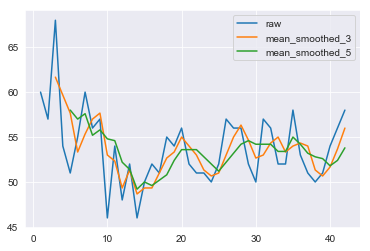

In [19]:
# Plot the raw and smoothed data
plt.plot(map_data, label='raw')
plt.plot(map_data.rolling(3).mean(), label='mean_smoothed_3')
plt.plot(map_data.rolling(5).mean(), label='mean_smoothed_5')
plt.legend()

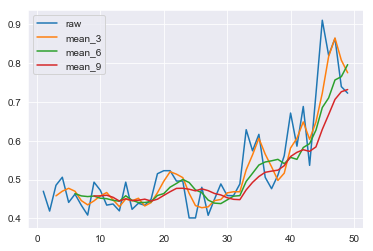

In [28]:
# Some raw map values
shock_data = df['ShockIndex'].loc[22]
plt.plot(shock_data, label='raw')
plt.plot(shock_data.rolling(3).mean(), label='mean_3')
plt.plot(shock_data.rolling(6).mean(), label='mean_6')
plt.plot(shock_data.rolling(9).mean(), label='mean_9')
plt.legend()

## Examine all variables

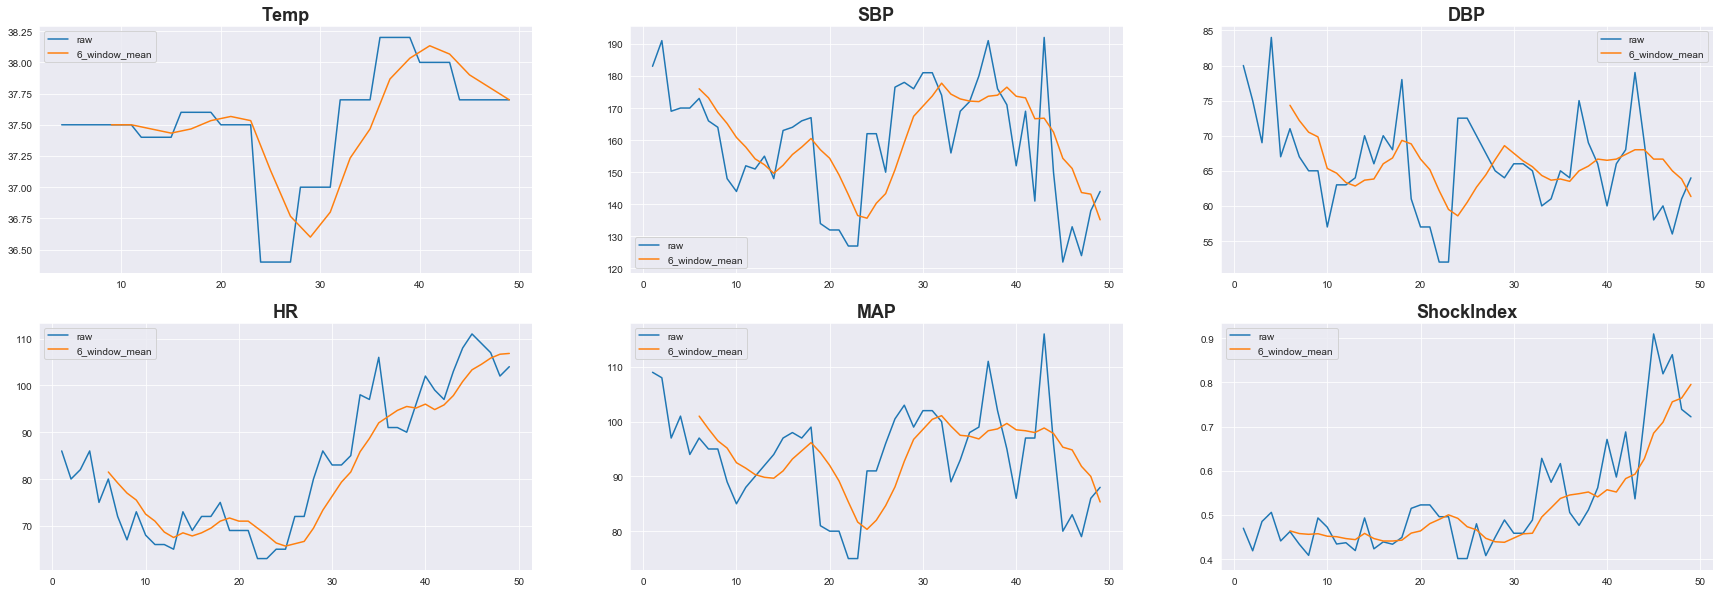

In [34]:
vbls = ['Temp', 'SBP', 'DBP', 'HR', 'MAP', 'ShockIndex']
n_cols = 3
n_rows = int(len(vbls) / n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(30, 10))
ax = ax.ravel()

for i, vbl in enumerate(vbls):
    ax[i].plot(df[vbl].loc[22], label='raw')
    ax[i].plot(df[vbl].loc[22].rolling(6).mean(), label='6_window_mean')
    ax[i].legend()
    ax[i].set_title(vbl, fontweight='bold', fontsize=18)

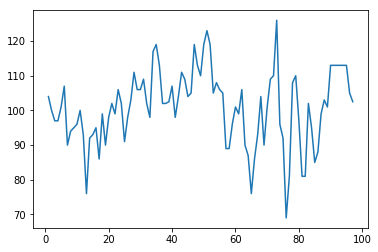

In [38]:
plt.plot(df['MAP'].loc[sepsis_ids[12]])